### Variable for dataset location
|              |                 |              |Dataset          |              |                 |
|--------------|-----------------|--------------|-----------------|--------------|-----------------|
|              |Train            |              |Validation       |              |Test             |
|blue_jellyfish|compass_jellyfish|blue_jellyfish|compass_jellyfish|blue_jellyfish|compass_jellyfish|
|01-33.jpg     |01-33.jpg        |34-44.jpg     |34-44.jpg        |45-55.jpg     |45-55.jpg        |

In [15]:
train_dir = './dataset_blue_and_compass_jellyfish/train/'
validation_dir = './dataset_blue_and_compass_jellyfish/validation/'
test_dir = './dataset_blue_and_compass_jellyfish/test/'

### Image data preprocessing
- ref link: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagerescale = ImageDataGenerator(rescale=1./255) ### RGB to convert 0,1
test_imagerescale = ImageDataGenerator(rescale=1./255)  ### RGB to convert 0,1

train_imagedatagenerator = train_imagerescale.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    #batch_size = 11,   ### Run 11 images at a time of fit
    class_mode = 'binary'
)

validation_imagedatagenerator = test_imagerescale.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    #batch_size = 11,   ### Run 11 images at a time of fit
    class_mode = 'binary'
)

Found 22 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


### Using 4 x Conv layers and then flat and add 1 x Dense layer
- ref link: https://www.tensorflow.org/api_docs/python/tf/keras/layers, https://www.tensorflow.org/api_docs/python/tf/keras/models

In [19]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)
                       )
         )
model.add(layers.MaxPooling2D(
            (2, 2) ### Image shape become (75 , 75)
            )
         )

model.add(layers.Conv2D(64, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D(
            (2, 2)  ### Image shape become (37.5 , 37.5)
            )
         )

model.add(layers.Conv2D(128, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D(
            (2, 2) ### Image shape become (18 , 18)
            )
         )

model.add(layers.Conv2D(128, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D(
            (2, 2) ### Image shape become (9, 9)
            )
         )

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

### Compiling the model

In [22]:
from tensorflow.keras import optimizers

model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.Adam(epsilon=0.01),
    metrics = ['binary_accuracy']
)

# model.compile(
#     optimizer=optimizers.RMSprop(lr=le-4),
#     loss='binary_crossentropy',
#     metrics=['acc'],
# )

### fitting  model
- ref link: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

In [23]:
history = model.fit(
    train_imagedatagenerator,
    #steps_per_epoch = 2, ### our batch size is 11 and total images are 22 for train data
    validation_data=validation_imagedatagenerator,
    #validation_steps= 6, ### our batch size is 11 and total images are 66 for validation data
    epochs=25,
)

Epoch 1/25


2023-11-01 08:16:28.120938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - ETA: 0s - loss: 0.6957 - binary_accuracy: 0.4091

2023-11-01 08:16:30.634447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 3s 3s/step - loss: 0.6957 - binary_accuracy: 0.4091 - val_loss: 0.6930 - val_binary_accuracy: 0.5303
Epoch 2/25
1/1 [==============================] - 0s 202ms/step - loss: 0.6952 - binary_accuracy: 0.4545 - val_loss: 0.6927 - val_binary_accuracy: 0.5606
Epoch 3/25
1/1 [==============================] - 0s 200ms/step - loss: 0.6944 - binary_accuracy: 0.4545 - val_loss: 0.6923 - val_binary_accuracy: 0.5909
Epoch 4/25
1/1 [==============================] - 0s 192ms/step - loss: 0.6936 - binary_accuracy: 0.4545 - val_loss: 0.6919 - val_binary_accuracy: 0.6061
Epoch 5/25
1/1 [==============================] - 0s 197ms/step - loss: 0.6927 - binary_accuracy: 0.5455 - val_loss: 0.6914 - val_binary_accuracy: 0.6364
Epoch 6/25
1/1 [==============================] - 0s 196ms/step - loss: 0.6917 - binary_accuracy: 0.5909 - val_loss: 0.6910 - val_binary_accuracy: 0.6212
Epoch 7/25
1/1 [==============================] - 0s 195ms/step - loss: 0.6905 - binary_ac

### data plotting

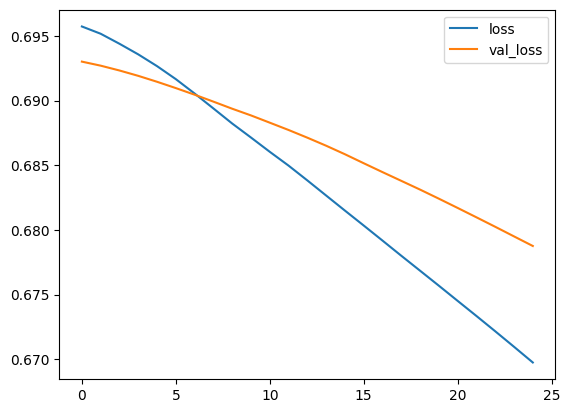

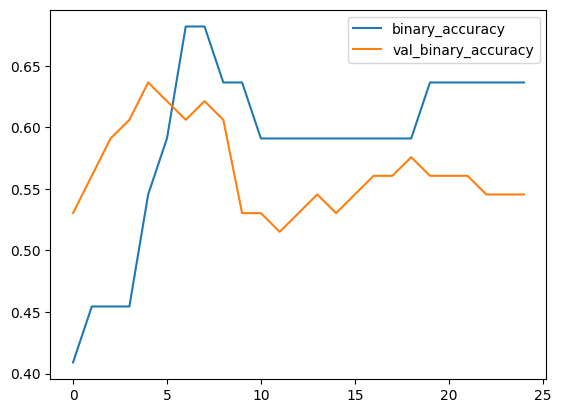

In [24]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

### Using Data Augmentation as above graph is showing overfitting (loss < val_loss and accuracy > val_accuracy)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagerescale = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)
traing_imagedatagenerator = train_imagerescale.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=11,
    class_mode='binary'
)

test_imagerescale = ImageDataGenerator(rescale=1./255)
validation_imagedatagenerator = test_imagerescale.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=11,
    class_mode='binary'
)

Found 22 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (150, 150, 3)
                       )
         )
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [28]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.Adam(epsilon=0.01),
    metrics = ['binary_accuracy']
)

In [37]:
history = model.fit(
    train_imagedatagenerator,
    #steps_per_epoch = 2, ### our batch size is 11 and total images are 22 for train data
    validation_data=validation_imagedatagenerator,
    #validation_steps= 6, ### our batch size is 11 and total images are 66 for validation data
    epochs=25,
)

Epoch 1/25
1/1 [==============================] - ETA: 0s - loss: 0.6768 - binary_accuracy: 0.8636

2023-11-01 08:22:38.732808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-11-01 08:22:38.867600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 184ms/step - loss: 0.6768 - binary_accuracy: 0.8636 - val_loss: 0.6815 - val_binary_accuracy: 0.8182
Epoch 2/25
1/1 [==============================] - 0s 137ms/step - loss: 0.6759 - binary_accuracy: 0.8636 - val_loss: 0.6811 - val_binary_accuracy: 0.8182
Epoch 3/25
1/1 [==============================] - 0s 137ms/step - loss: 0.6749 - binary_accuracy: 0.8636 - val_loss: 0.6807 - val_binary_accuracy: 0.8182
Epoch 4/25
1/1 [==============================] - 0s 144ms/step - loss: 0.6739 - binary_accuracy: 0.8636 - val_loss: 0.6802 - val_binary_accuracy: 0.8182
Epoch 5/25
1/1 [==============================] - 0s 136ms/step - loss: 0.6730 - binary_accuracy: 0.8636 - val_loss: 0.6798 - val_binary_accuracy: 0.8182
Epoch 6/25
1/1 [==============================] - 0s 137ms/step - loss: 0.6720 - binary_accuracy: 0.8636 - val_loss: 0.6793 - val_binary_accuracy: 0.8182
Epoch 7/25
1/1 [==============================] - 0s 141ms/step - loss: 0.6709 - binary

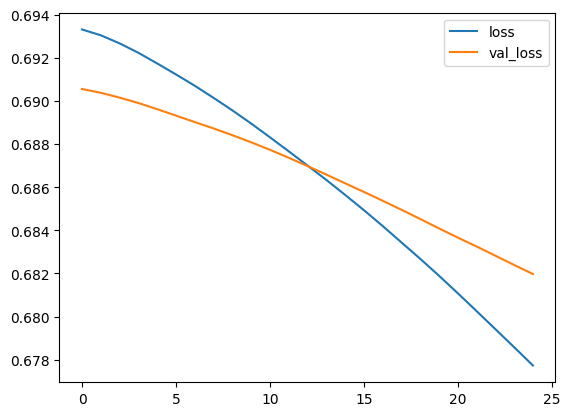

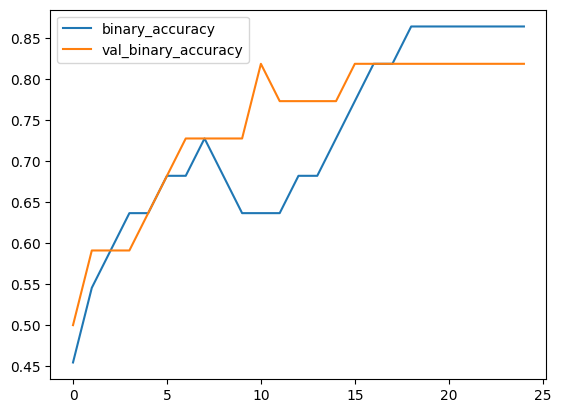

In [30]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

# pd.DataFrame(history.history)plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0,1)
# plt.show()

In [38]:
model.save('cat_vs_blue_jellyfish_20231101_02.keras')

In [36]:
import tensorflow as tf
new_model = tf.keras.models.load_model('cat_vs_blue_jellyfish_20231101_02.keras')

# Show the model architecture
new_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 128)     